In [1]:
import os
import json
from pathlib import Path
import fnmatch
import shutil
from more_itertools import consecutive_groups
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [8]:
import rootpath

In [40]:
root= rootpath.detect()
root

'/home/yiyi/Documents/masterarbeit/CPD'

In [11]:
data_dir = os.path.join(root, "data", "select_reviews_06152020")

In [12]:
filename = '0#f116f785-8626-48f3-a390-c0c4a03b5bd6'

In [13]:
json_file = os.path.join(data_dir, "room", "reviews","json_file", filename+".json")
emas_file = os.path.join(data_dir, "room", "emas", filename+'.png')
wbs_file = os.path.join(data_dir, "room", "wbs", filename+'.png')

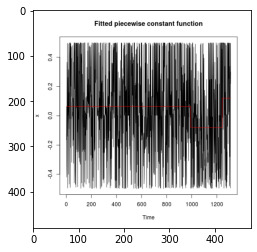

In [14]:
img = mpimg.imread(wbs_file)
imgplot = plt.imshow(img)
plt.show()

In [15]:
with open(json_file) as reader:
    data = json.load(reader)

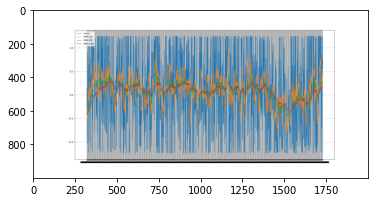

In [16]:
img2 = mpimg.imread(emas_file)
imgplot2= plt.imshow(img2)
plt.show()

In [17]:
for path in os.listdir(data_dir):
    print(path)

facility
atmosphere
family
fitness
venue
reception
beach
pool
entertainment
parking
restaurant
room
renovation_related
price


In [41]:
json_dir = os.path.join(root, "data", "select_reviews_06152020_json" )
if not os.path.exists(json_dir):
    os.mkdir(json_dir)

In [42]:
png_dir = os.path.join(root, "data", "select_reviews_06152020_png" )
if not os.path.exists(png_dir):
    os.mkdir(png_dir)

In [ ]:
### not do
for file in Path(data_dir).rglob("**/*.json"):
    src_file = file
    dest_file = os.path.join(json_dir, file.name )
    shutil.copy(file, dest_file)
    print(dest_file)

In [ ]:
for file in Path(data_dir).rglob("**/*.json"):
    filename = file.name
    print(file)
    dirna = file.parent
    if filename.startswith("renovation_related-"):
        filename=filename.replace("renovation_related-", "", 1)
    try:
        filename_new = filename.split("_",1)[1]
        new_filepath = os.path.join(dirna, filename_new)
        os.rename(file, new_filepath)
    except Exception:
        print(Exception)
    

In [ ]:
# rename all the json files.
for root, dirnames, filenames in os.walk(data_dir):
    for filename in fnmatch.filter(filenames, "*.json"):
        print(filename)
        category = root.replace(data_dir+'/','').replace('/reviews/json_file','').replace("/","-")
        new_filename = category + "_" + filename
        filepath = os.path.join(root, filename)
        new_filepath = os.path.join(root, new_filename)
        os.rename(filepath, new_filepath)

In [38]:
# rename all png.
for root, dirnames, filenames in os.walk(data_dir):
    for filename in fnmatch.filter(filenames, "*.png"):
        category = root.replace(data_dir+'/','').replace('/reviews/json_file','').replace("/","-")
        new_filename = category + "_" + filename
        filepath = os.path.join(root, filename)
        new_filepath = os.path.join(root, new_filename)
        os.rename(filepath, new_filepath)

In [ ]:
# copy json files into a new dir
for file in Path(data_dir).rglob("**/*.json"):
    src_file = file
    print(file)
    dest_file = os.path.join(root, "data", "select_reviews_06152020_json", file.name )
    shutil.copy(file, dest_file)
    print(dest_file)

In [ ]:
# copy json files into a new dir
for file in Path(data_dir).rglob("**/*.png"):
    if "wbs" in file.name:
        src_file = file
        print(file)
        dest_file = os.path.join(root, "data", "select_reviews_06152020_wbs", file.name )
        shutil.copy(file, dest_file)
        print(dest_file)

In [42]:
os.getcwd()

'/home/yiyi/Documents/masterarbeit/CPD'

In [44]:
dest_dir = os.path.join(root, "data/select_reviews_06122020_wbs")
dest_dir

'/home/yiyi/Documents/masterarbeit/CPD/data/select_reviews_06122020_wbs'

In [ ]:
# copy json files into a new dir
dirna = os.path.join(root,"data", "prepared_data_20200615", "json_files")

for filename in os.listdir(dirna):
    if not filename.startswith('.'):
        # could have two "_"
        print("filename ==> ", filename)
        category = filename.rsplit("_",1)[0] # renovation_related-restaurant

        filename_ = filename.replace('.json','').rsplit("_",1)[1]
        filename_wbs = category + '-wbs_'+filename_+'.png'
        dest_path = os.path.join(root, "data", "prepared_data_20200612", "wbs")

        if "renovation_related" in category:
            middle_dir = category.replace('-','/')
            filepath = os.path.join(root, "data", "select_reviews_06122020", middle_dir, "wbs", filename_wbs)
            if os.path.exists(filepath):
                print(filepath)
                shutil.copy(filepath, dest_path)
        else:
            filepath = os.path.join(root, "data", "select_reviews_06122020", category, "wbs", filename_wbs)
            if os.path.exists(filepath):
                print(filepath)
                shutil.copy(filepath, dest_path)


In [51]:
dirna = os.path.join(root, "data", "select_reviews_06152020_json")

In [17]:
dirna_wbs = os.path.join(root, "data", "select_reviews_06122020_wbs")

In [10]:
for filename in os.listdir(dirna):
    category = filename.split("&")[0]
    if category == "renovation":
        os.remove(os.path.join(dirna, filename))

In [48]:
dirout = os.path.join(root, "data", "prepared_data_20200615", "json_files")

if not os.path.exists(dirout):
    os.mkdir(dirout)

In [49]:
dirna

'/home/yiyi/Documents/masterarbeit/CPD/data/select_reviews_06152020_json'

In [53]:
count_file = 0
for filename in os.listdir(dirna):
    filepath = os.path.join(dirna, filename) 
    if os.path.isfile(filepath) and not filename.startswith("."):
        with open(filepath) as reader:
            data = json.load(reader)
            sentences= data["sentences"]
            cpt = data["cpt"] # [0, 1008, 1132, 1310]
            cpts= list([int(x) for x in sentences.keys()])
            groups=list( consecutive_groups(cpts))
            outfile = os.path.join(dirout, filename)
            
            
            keys = [int(x) for x in sentences.keys()]
            dates_periods = data["dates_periods"]
            dates_periods_ = [dates_periods[key] for key in keys]
            cpt_ = [cpt[int(x)+1] for x in keys]
            
            if(len(sentences.keys())>1):
                count_file +=1 
                if len(groups)==1:
                    shutil.copy(filepath, outfile)
                    
#                 else:
#                     print("*"*40)
#                     data_new={}
#                     sentences_new = {}
#                     count=0
#                     for key, item in data["sentences"].items():
#                         sentences_new[count]= item
#                         count+=1
#                     data_new={
#                         "sentences": sentences_new,
#                         "cpt":cpt_,
#                         "dates_periods": dates_periods_
#                     }
#                     print(filename)
#                     print(keys)
            
#                     with open(outfile, "w") as writer:
#                         print("replace : ", outfile)
#                         json.dump(data_new, writer)

count_file

1358

In [55]:
# stats in the file.
from collections import defaultdict
category_dict = defaultdict(int)
for file in os.listdir(dirout):
    category= file.rsplit("_", 1)[0]
    category_dict[category]+=1
    

In [59]:
category_dict

import operator
sorted_dict = sorted(category_dict.items(), key=operator.itemgetter(1))

In [60]:
sorted_dict

[('renovation_related-entertainment', 1),
 ('renovation_related-beach', 1),
 ('renovation_related-venue', 1),
 ('renovation_related-atmosphere', 2),
 ('renovation_related-restaurant', 3),
 ('renovation_related-reception', 3),
 ('renovation_related-pool', 4),
 ('renovation_related-facility', 10),
 ('entertainment', 13),
 ('venue', 23),
 ('beach', 24),
 ('family', 30),
 ('parking', 42),
 ('fitness', 47),
 ('price', 55),
 ('atmosphere', 55),
 ('pool', 86),
 ('renovation_related-room', 94),
 ('facility', 108),
 ('restaurant', 119),
 ('reception', 126),
 ('room', 179)]